

# **CSMODEL S15: GROUP 5 PHASE 2**
CELEMEN, MARK EDRIAN D.<br>
ENCALLADO, EDLYNN REI C.<br>
GILDORE, ANDREI MIGUEL C.<br>
LEE, HANNAH<br>
VILLORENTE, KHYLE RAEKA B.<br>

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.linear_model import Lasso
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LassoCV, Lasso
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from sklearn.model_selection import train_test_split
!pip install category_encoders
from category_encoders import TargetEncoder, OneHotEncoder
import seaborn as sns

In [ ]:
student_df = pd.read_csv('StudentPerformanceFactors.csv')

student_df.head()

,Hours_Studied,Attendance,Parental_Involvement,Access_to_Resources,Extracurricular_Activities,Sleep_Hours,Previous_Scores,Motivation_Level,Internet_Access,Tutoring_Sessions,Family_Income,Teacher_Quality,School_Type,Peer_Influence,Physical_Activity,Learning_Disabilities,Parental_Education_Level,Distance_from_Home,Gender,Exam_Score
0,23,84,Low,High,No,7,73,Low,Yes,0,Low,Medium,Public,Positive,3,No,High School,Near,Male,67
1,19,64,Low,Medium,No,8,59,Low,Yes,2,Medium,Medium,Public,Negative,4,No,College,Moderate,Female,61
2,24,98,Medium,Medium,Yes,7,91,Medium,Yes,2,Medium,Medium,Public,Neutral,4,No,Postgraduate,Near,Male,74
3,29,89,Low,Medium,Yes,8,98,Medium,Yes,1,Medium,Medium,Public,Negative,4,No,High School,Moderate,Male,71
4,19,92,Medium,Medium,Yes,6,65,Medium,Yes,3,Medium,High,Public,Neutral,4,No,College,Near,Female,70


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

MessageError: Error: credential propagation was unsuccessful

After uploading, you can confirm the file is available using the code below:

# **Data Cleaning**
 We performed the following Data Cleaning techniquese: checked for null-values, multiple representations in categorical columns, and outlier values in numerical columns.

In [ ]:
student_df.info()
student_df.shape

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6607 entries, 0 to 6606
Data columns (total 20 columns):
 #   Column                      Non-Null Count  Dtype 
---  ------                      --------------  ----- 
 0   Hours_Studied               6607 non-null   int64 
 1   Attendance                  6607 non-null   int64 
 2   Parental_Involvement        6607 non-null   object
 3   Access_to_Resources         6607 non-null   object
 4   Extracurricular_Activities  6607 non-null   object
 5   Sleep_Hours                 6607 non-null   int64 
 6   Previous_Scores             6607 non-null   int64 
 7   Motivation_Level            6607 non-null   object
 8   Internet_Access             6607 non-null   object
 9   Tutoring_Sessions           6607 non-null   int64 
 10  Family_Income               6607 non-null   object
 11  Teacher_Quality             6529 non-null   object
 12  School_Type                 6607 non-null   object
 13  Peer_Influence              6607 non-null   obje

(6607, 20)

The data type of each variables above seem to be correct

The group started checking if the dataset has any nulls or empty values

In [ ]:
student_df.isnull().any()

,0
Hours_Studied,False
Attendance,False
Parental_Involvement,False
Access_to_Resources,False
Extracurricular_Activities,False
Sleep_Hours,False
Previous_Scores,False
Motivation_Level,False
Internet_Access,False
Tutoring_Sessions,False


There are null values represented in three columns. Let us list them and print the number of null values in each column

In [ ]:
nan_variables = student_df.columns[student_df.isnull().any()].tolist()
print(nan_variables)

['Teacher_Quality', 'Parental_Education_Level', 'Distance_from_Home']


In [ ]:
student_df[nan_variables].isnull().sum()

,0
Teacher_Quality,78
Parental_Education_Level,90
Distance_from_Home,67


Since it is possible for Parental_Education_Level to be none (meaning there is no educational attainment), we can replace the null value with a sentinel value instead. Then we check if there are still null values left

In [ ]:
student_df['Parental_Education_Level'] = student_df['Parental_Education_Level'].fillna('None')

student_df['Parental_Education_Level'].isnull().any()

np.False_

In [ ]:
var_to_drop = list(['Teacher_Quality', 'Distance_from_Home'])
student_df = student_df.dropna(subset=var_to_drop)

student_df.isnull().any()


,0
Hours_Studied,False
Attendance,False
Parental_Involvement,False
Access_to_Resources,False
Extracurricular_Activities,False
Sleep_Hours,False
Previous_Scores,False
Motivation_Level,False
Internet_Access,False
Tutoring_Sessions,False


Then we check for multiple representations for categorical columns

In [ ]:
student_df['Parental_Involvement'].unique()

array(['Low', 'Medium', 'High'], dtype=object)

The Parental_Involvement categorical values are all consistent

In [ ]:
student_df['Access_to_Resources'].unique()

array(['High', 'Medium', 'Low'], dtype=object)

The Access_to_Resources categorical values are all consistent

In [ ]:
student_df['Extracurricular_Activities'].unique()

array(['No', 'Yes'], dtype=object)

The Extracurricular_Activities categorical values are all consistent

In [ ]:
student_df['Motivation_Level'].unique()

array(['Low', 'Medium', 'High'], dtype=object)

The Motivational_Level categorical values are all consistent

In [ ]:
student_df['Internet_Access'].unique()

array(['Yes', 'No'], dtype=object)

The Internet_Access categorical values are all consistent

In [ ]:
student_df['Family_Income'].unique()

array(['Low', 'Medium', 'High'], dtype=object)

The Family_Income categorical values are all consistent

In [ ]:
student_df['Teacher_Quality'].unique()

array(['Medium', 'High', 'Low'], dtype=object)

The Teacher_Quality categorical values are all consistent

In [ ]:
student_df['School_Type'].unique()

array(['Public', 'Private'], dtype=object)

The School_Type categorical values are all consistent

In [ ]:
student_df['Peer_Influence'].unique()

array(['Positive', 'Negative', 'Neutral'], dtype=object)

The Peer_Influence categorical values are all consistent

In [ ]:
student_df['Learning_Disabilities'].unique()

array(['No', 'Yes'], dtype=object)

The Learning_Disabilities categorical values are all consistent

In [ ]:
student_df['Parental_Education_Level'].unique()

array(['High School', 'College', 'Postgraduate', 'None'], dtype=object)

The Parental_Education_Level has null values but categorical values are all consistent



In [ ]:
student_df['Distance_from_Home'].unique()

array(['Near', 'Moderate', 'Far'], dtype=object)

The Distance_from_Home has categorical values are all consistent

In [ ]:
student_df['Gender'].unique()

array(['Male', 'Female'], dtype=object)

The Gender categorical values are all consistent

There exists an exam score greater than 100 (101). We will check the row then to keep the data normalized, we will cap the score to 100

In [ ]:
greater_than_100 = student_df['Exam_Score'] > 100
student_df[greater_than_100]

student_df.loc[student_df['Exam_Score'] > 100, 'Exam_Score'] = 100

# **I. Data Modelling**

For our data modelling, we used Lasso Regression to find out which features have significant coefficients to find the ones that seem to be the most relevant to our study. Since our study aims to discover which factors may have a significant effect on the exam scores of the students, Lasso Regression will be used to evaluate all columns of our dataset and will show the top significant coefficients.

In [ ]:
#Declare the dependent category
Dependent = 'Exam_Score'

#Separate the columns by natures:
#Binary_col : columns with 2 options
Binary_Col = ['Gender', 'Internet_Access', 'School_Type', 'Learning_Disabilities', 'Extracurricular_Activities']
#Categorical_col : columns with more than 2 options
Categorical_Col = ['Parental_Involvement', 'Access_to_Resources', 'Motivation_Level', 'Family_Income', 'Teacher_Quality', 'Peer_Influence', 'Parental_Education_Level', 'Distance_from_Home']
#Num_col : columns that are numerical in nature
Num_Col = ['Hours_Studied', 'Attendance', 'Sleep_Hours', 'Previous_Scores', 'Tutoring_Sessions', 'Physical_Activity']

y = student_df[Dependent]
# Ensure 'Hours_Bin' is dropped if it exists from previous runs
if 'Hours_Bin' in student_df.columns:
    x = student_df.drop([Dependent, 'Hours_Bin'], axis=1)
else:
    x = student_df.drop(Dependent, axis=1)

# Split the data into training and testing sets
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=42)

onehot_encoder = OneHotEncoder(cols=Binary_Col, use_cat_names=True, handle_unknown='ignore')
target_encoder = TargetEncoder(cols=Categorical_Col)
scaler = StandardScaler()

# Encode binary_col features
x_train_temp = onehot_encoder.fit_transform(x_train)
x_test_temp = onehot_encoder.transform(x_test)

# Encode categorical_col features using target encoder
# The output of target_encoder should be used for the final dataframe
x_train_final = target_encoder.fit_transform(x_train_temp, y_train)
x_test_final = target_encoder.transform(x_test_temp)

# Scale numerical columns after all encoding is done
x_train_final[Num_Col] = scaler.fit_transform(x_train_final[Num_Col])
x_test_final[Num_Col] = scaler.transform(x_test_final[Num_Col])

# Align columns to ensure consistent features between train and test sets
x_train_final, x_test_final = x_train_final.align(x_test_final, join='left', axis=1, fill_value=0)

print(f'Original features: {x.shape[1]}')
print(f'Features after encoding: {x_train_final.shape[1]}')
print(f'Sample of final features: {x_train_final.columns.tolist()[:8]}')

Original features: 19
Features after encoding: 24
Sample of final features: ['Hours_Studied', 'Attendance', 'Parental_Involvement', 'Access_to_Resources', 'Extracurricular_Activities_No', 'Extracurricular_Activities_Yes', 'Sleep_Hours', 'Previous_Scores']


Originally, the dataset contained 19 features, many of which were categorical. After encoding these categorical variables, the total number of model-ready features increased to 24.


In [ ]:
# LassoCV to select alpha (5-fold)
lasso_cv = LassoCV(cv=5, random_state=42, max_iter=10000)
lasso_cv.fit(x_train_final, y_train)
best_alpha = lasso_cv.alpha_
print('Selected alpha:', best_alpha)

# Fit final Lasso with best alpha
model = Lasso(alpha=best_alpha, random_state=42, max_iter=10000)
model.fit(x_train_final, y_train)

# Predictions
y_pred_test = model.predict(x_test_final)
y_pred_train = model.predict(x_train_final)

# Metrics
rmse_test = np.sqrt(mean_squared_error(y_test, y_pred_test))
mae_test = mean_absolute_error(y_test, y_pred_test)
r2_test = r2_score(y_test, y_pred_test)

rmse_train = np.sqrt(mean_squared_error(y_train, y_pred_train))
r2_train = r2_score(y_train, y_pred_train)

print(f"\nLasso Regression Test RMSE (alpha={best_alpha}): {rmse_test:.4f} points")
print(f"Lasso Regression Test MAE (alpha={best_alpha}): {mae_test:.4f}")
print(f"Lasso Regression Test R2 (alpha={best_alpha}): {r2_test:.4f}")

print(f"Lasso Regression Train RMSE (alpha={best_alpha:}): {rmse_train:.4f} points")
print(f"Lasso Regression Train R2 (alpha={best_alpha}): {r2_train:.4f}")

coefficients = pd.Series(model.coef_, index=x_train_final.columns)
significant_coeffs = coefficients[coefficients.abs() > 0.01].sort_values(ascending=False)
zero_coeffs = len(coefficients[coefficients.abs() <= 0.01])

print("\nTop Significant Coefficients")
print(significant_coeffs.round(2))
print(f"\nNumber of features reduced (coefficients set to near-zero): {zero_coeffs} out of {x_train_final.shape[1]}")

Selected alpha: 0.002800295311794833

Lasso Regression Test RMSE (alpha=0.002800295311794833): 2.0338 points
Lasso Regression Test MAE (alpha=0.002800295311794833): 0.5089
Lasso Regression Test R2 (alpha=0.002800295311794833): 0.7216
Lasso Regression Train RMSE (alpha=0.002800295311794833): 2.0668 points
Lasso Regression Train R2 (alpha=0.002800295311794833): 0.7229

Top Significant Coefficients
Attendance                       2.30
Hours_Studied                    1.78
Teacher_Quality                  1.26
Parental_Involvement             1.15
Access_to_Resources              1.08
Motivation_Level                 1.02
Family_Income                    1.00
Peer_Influence                   0.99
Parental_Education_Level         0.97
Internet_Access_Yes              0.83
Learning_Disabilities_No         0.82
Distance_from_Home               0.81
Previous_Scores                  0.72
Tutoring_Sessions                0.60
Physical_Activity                0.18
Sleep_Hours                    

A Lasso model is generated with a selected alpha using 5-Fold Cross-Validation. This was done in order to avoid overfitting the model and yield for the lowest error in our model.

With exam scores ranging from 0–100, an RMSE of 2.0668 means the model’s predictions differ from the true score by about ±2 points on average, which indicates reasonably good predictive performance.

The MAE of about 0.51 points  also indicate that the absolute error on average of the model is quite small. Additionally, the R2 value of 72% also indicates that the predictors in the model mostly explain the variations behind the exam scores of students.

Finally, the difference between the Test v Train metrics are quite close, indicating that the model does not overfit and performs consistently well.


Most feature coefficients were shrunk to near zero, leaving only two significant predictors that indicate a positive impact on exam scores:

- Attendance (2.30)
- Hours Studied (1.78)


The Non-Participation in Extracurricular Activities (-0.56) predictor on the other hand indicate a negative impact, suggesting that participation might be beneficial.

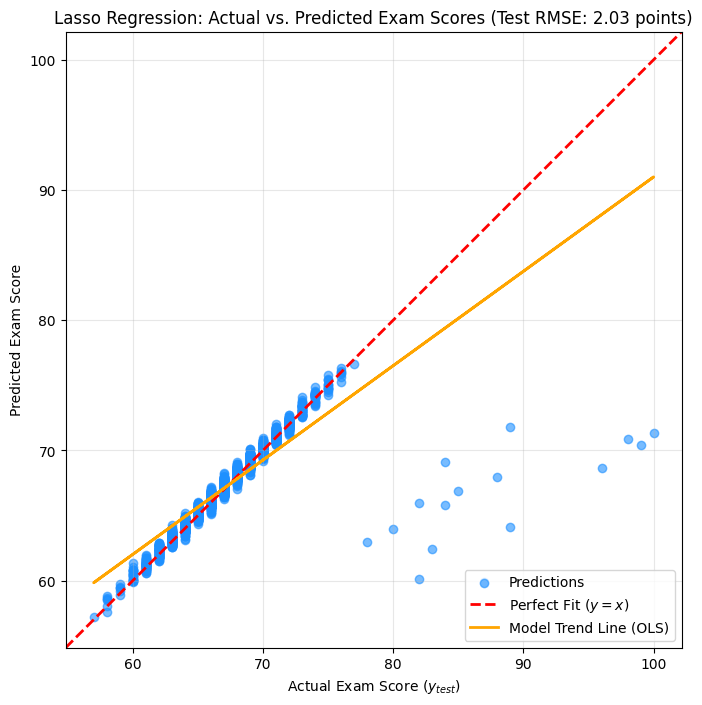

In [ ]:

rmse = np.sqrt(mean_squared_error(y_test, y_pred_test))

min_value = np.min([y_test.min(), y_pred_test.min()])
max_value = np.max([y_test.max(), y_pred_test.max()])

range_value = (max_value - min_value) * 0.05
plot_min = min_value - range_value
plot_max = max_value + range_value

plt.figure(figsize=(8, 8))
plt.scatter(y_test, y_pred_test, alpha=0.6, color='dodgerblue', label='Predictions')

plt.plot(
    [plot_min, plot_max],
    [plot_min, plot_max],
    color='red',
    linestyle='--',
    linewidth=2,
    label='Perfect Fit ($y=x$)'
)

z = np.polyfit(y_test, y_pred_test, 1)
p = np.poly1d(z)
plt.plot(
    y_test,
    p(y_test),
    color='orange',
    linestyle='-',
    linewidth=2,
    label='Model Trend Line (OLS)'
)

plt.title(f'Lasso Regression: Actual vs. Predicted Exam Scores (Test RMSE: {rmse:.2f} points)')
plt.xlabel('Actual Exam Score ($y_{test}$)')
plt.ylabel('Predicted Exam Score')
plt.legend(loc='lower right')
plt.grid(True, alpha=0.3)

plt.gca().set_aspect('equal', adjustable='box')
plt.xlim(plot_min, plot_max)
plt.ylim(plot_min, plot_max)

plt.show()

The scatter plot comparing actual to predicted exam scores visually proves the model's overall predictive capability. The graph's data points within the approximate range of 63-72 are generally clustering around the red 'perfect fit' line, indicating a strong positive correlation.

The graph also reinforces the quantitative metrics of the R2 score of approximately 0.72 and an RMSE of about 2.03 points, which suggest a robust model performance. The orange line, representing the model's trend, closely follows the ideal, signifying that for the majority of the data, predictions are quite accurate.

However, a key observation is the model's tendency towards 'regression to the mean,' where it appears to underestimate higher actual scores and overestimate lower actual scores, compressing predictions within a narrower range.

This behavior is largely attributed to the Lasso Regression's inherent feature selection process; by prioritizing a limited set of highly influential variables (like 'Attendance' and 'Hours_Studied') and regularizing others to near-zero, the model sacrifices some capacity to predict extreme outcomes. While this regularization enhances generalizability and prevents overfitting, it moderates the model's ability to capture the full spectrum of variance, particularly at the tails of the score distribution.

To further validate the quality of the linear regression model, we will also be analyzing the residuals.

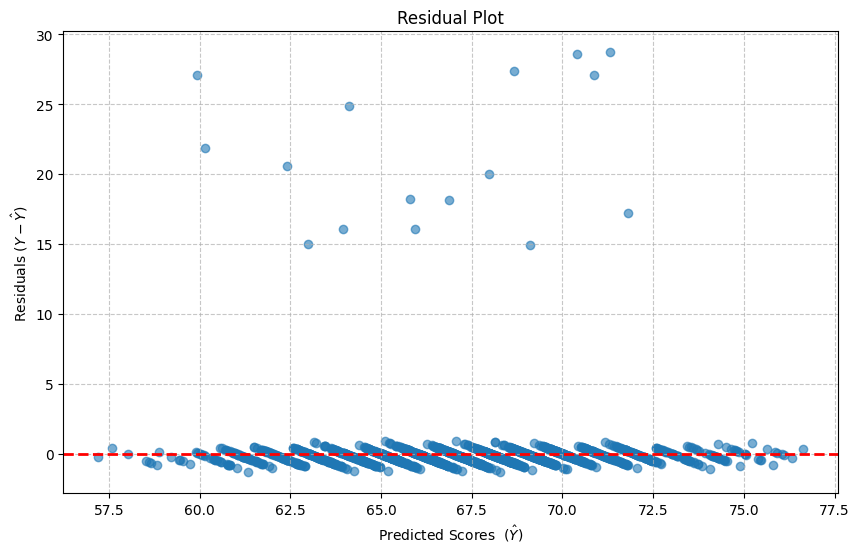

In [ ]:
residuals = y_test - y_pred_test
plt.figure(figsize=(10, 6))
plt.scatter(x=y_pred_test, y=residuals, alpha=0.6)

plt.axhline(y=0, color='r', linestyle='--', linewidth = 2)
plt.title('Residual Plot')
plt.xlabel('Predicted Scores  ($\\hat{Y}$)')
plt.ylabel('Residuals ($Y - \\hat{Y}$)')
plt.grid(True, linestyle='--', alpha=0.7)
plt.show()

Based on the residual plot, we infer that the model showed that most of the data points are clustered around the zero line which is a positive indicator that the model's predicitons are generally unbiased.

However, higher predicted scores show a noticable pattern where the spread of residuals widen which suggests that there is a higher variance or less consistent predicitons for students who are expected to have higher exam scores.

# **II. Statistical Inference**

In this section, we tested statistically whether our study-behavior variables really affect academic performance. Yes, the regression already suggested that Hours Studied and Attendance mattered, but we still needed stronger statistical evidence.

Before doing any correlation or ANOVA, we checked whether the variables follow a normal distribution. This matters because it tells us whether to use Pearson or Spearman, and whether ANOVA assumptions are acceptable.



```
# This is formatted as code
```

# Correlation Significance Test: Hours Studied vs Exam Score

Since our dataset has more than 5000 observations, Shapiro Wilk becomes overly sensitive. So instead of running it on all rows, we directly sampled 500 observations for Hours Studied and Exam Score, enough to detect skew without over-triggering the sensitivity.

In [ ]:
from scipy.stats import shapiro, spearmanr

hours = student_df['Hours_Studied']
scores = student_df['Exam_Score']

# Sample of 500 for normality check
sh_hours = shapiro(hours.sample(n=500, random_state=42))
sh_scores = shapiro(scores.sample(n=500, random_state=42))

print("Shapiro Wilk:")
print(f"Hours Studied p value: {sh_hours.pvalue:.3e}")
print(f"Exam Score p value: {sh_scores.pvalue:.3e}")

Shapiro Wilk:
Hours Studied p value: 1.205e-01
Exam Score p value: 1.342e-10


Since both p values are extremely small (way below 0.05), the data is **not normally distributed**. Hence, we used **Spearman correlation** to test whether study hours are statistically related to exam scores.

### Hypotheses
* H₀: There is no significant relationship between Hours Studied and Exam Score.
* H₁: There is a significant relationship between Hours Studied and Exam Score.

In [ ]:
# Spearman bc atleast one variable is non normal
corr_stat, corr_p = spearmanr(hours, scores)

print("\nUsing Spearman Correlation:")
print(f"Correlation coefficient: {corr_stat:.6f}")
print(f"p value: {corr_p:.3e}")


Using Spearman Correlation:
Correlation coefficient: 0.480956
p value: 0.000e+00


The Spearman correlation coefficient is 0.482885, which sits in that “gray area” of being moderate but meaningful. We should also note the p value of 0.000. Since it is far below 0.05, we reject the null hypothesis.

Therefore, **Hours Studied is significantly related to Exam Score**. This means that the students who study more hours tend to score higher, and the effect is statistically significant, which also matches the model.

# ANOVA: Access to Educational Resources vs Exam Score

## Hypotheses
* H₀: All resource groups have the same mean exam score.
* H₁: At least one group has a different mean exam score.

Because Access_to_Resources has three groups (Low, Medium, High), we needed to see if their exam scores differ significantly.

Again using samples of 500:

In [ ]:
from scipy.stats import f_oneway, kruskal

# Group data
low = student_df[student_df['Access_to_Resources'] == 'Low']['Exam_Score']
med = student_df[student_df['Access_to_Resources'] == 'Medium']['Exam_Score']
high = student_df[student_df['Access_to_Resources'] == 'High']['Exam_Score']

# Normality test for each group
print("Shapiro Wilk Normality Test:")
for group_name, group_data in zip(['Low', 'Medium', 'High'], [low, med, high]):
    stat, p = shapiro(group_data.sample(n=500, random_state=42))
    print(f"{group_name} p value: {p}")


Shapiro Wilk Normality Test:
Low p value: 2.6677464388028963e-18
Medium p value: 2.911631148952519e-19
High p value: 1.2271128073015132e-14


* Low: 2.76 × 10⁻¹⁹
* Medium: 2.24 × 10⁻¹³
* High: 7.22 × 10⁻²¹

All groups are < 0.05 hence, they are non-normal. However, normality is not strictly required for ANOVA if variances are similar.

In [ ]:
# Variance check
print("\nGroup Standard Deviations:")
print(low.std(), med.std(), high.std())


Group Standard Deviations:
3.5624550976140026 3.8694825967652102 3.9483255626849503


Standard deviations:
* Low: 3.56
* Medium: 3.88
* High: 3.97

Since the variances are close, a one-way ANOVA is justifiable.

In [ ]:
from scipy.stats import f_oneway

stat, p_value = f_oneway(low, med, high)

print("ANOVA Results:")
print(f"F statistic: {stat:.4f}")
print(f"p value: {p_value:.3e}")

ANOVA Results:
F statistic: 98.0044
p value: 1.139e-42


* F statistic: 94.12
* p value: 5.11 × 10⁻⁴¹

Because the p value is extremely small with it being < 0.05, we reject the null hypothesis. This means that **Exam Scores significantly differ based on Access to Resources**.

## Chi Square Test of Independence

Now we check whether study hours and resource access are associated or independent. It tests whether study behaviors cluster together, meaning, do students who study more also tend to have more resources?

In [ ]:
from scipy.stats import chi2_contingency

student_df['Hours_Bin'] = pd.cut(student_df['Hours_Studied'],
                                 bins=[-1,5,10,15,20,25,30,40,100],
                                 labels=['0-5','6-10','11-15','16-20','21-25','26-30','31-40','41+'])

contingency = pd.crosstab(student_df['Hours_Bin'], student_df['Access_to_Resources'])
display(contingency)

chi2, p, dof, expected = chi2_contingency(contingency)
print("\nChi square Test of Independence:")
print(f"Chi square statistic: {chi2:.4f}")
print(f"p value: {p:.3e}")

Access_to_Resources,High,Low,Medium
Hours_Bin,,,
0-5,20,14,25
6-10,92,58,156
11-15,349,200,591
16-20,596,406,1037
21-25,553,408,929
26-30,286,180,454
31-40,79,46,126
41+,0,1,1



Chi square Test of Independence:
Chi square statistic: 12.1453
p value: 5.946e-01


* p = 0.5770

Since this is > 0.05, we fail to reject the null hypothesis.
Surprisingly, **access to resources does not predict whether a student studies more hours**.

Students’ study habits seem independent of their level of resource access. This gives us a new insight in which academic advantages do not necessarily translate to more time spent studying.

## ANOVA across Study Hour Bins

> Add blockquote



Now we bin the hours studied and check whether exam scores differ across bins and find out if there's a point where more study hours no longer help.

In [ ]:
from scipy.stats import f_oneway

groups = [student_df[student_df['Hours_Bin'] == b]['Exam_Score']
          for b in student_df['Hours_Bin'].cat.categories]

group_names = list(student_df['Hours_Bin'].cat.categories)

groups_nonempty = [g for g in groups if len(g) > 0]
names_nonempty = [name for name, g in zip(group_names, groups) if len(g) > 0]

anova_stat_bins, anova_p_bins = f_oneway(*groups_nonempty)
print("ANOVA across Hours_Bin:")
print(f"F-statistic: {anova_stat_bins:.4f}, p-value: {anova_p_bins:.3e}")

ANOVA across Hours_Bin:
F-statistic: 220.2169, p-value: 4.380e-295


* p value = 1.57 × 10⁻²⁸⁹

With the p being insanely small, we reject the null hypothesis. **There are statistically significant differences in exam scores across different study-hour ranges**.

This test confirms the earlier correlation but more in a categorical, more “practical” manner. It shows that the effect of study hours is not random, but different study groups really result different outcomes.

# Correlation Significance Test: Attendance vs Exam Score

Similar to our analysis of study hours, we now examine the relationship between Attendance and Exam Score. The Lasso Regression model indicated that Attendance had the highest positive coefficient (2.30), suggesting it is a strong predictor. We will now verify this statistically.

First, we check the normality of the Attendance data to determine the appropriate correlation test (Pearson vs. Spearman).

In [ ]:
from scipy.stats import shapiro, spearmanr

attendance = student_df['Attendance']
scores = student_df['Exam_Score']

# Shapiro-Wilk test for normality (using a sample of 500 to avoid over-sensitivity)
sh_att = shapiro(attendance.sample(n=500, random_state=42))
sh_scores = shapiro(scores.sample(n=500, random_state=42))

print("Shapiro-Wilk Normality Test Results:")
print(f"Attendance p-value: {sh_att.pvalue:.3e}")
print(f"Exam Score p-value:  {sh_scores.pvalue:.3e}")

Shapiro-Wilk Normality Test Results:
Attendance p-value: 4.469e-12
Exam Score p-value:  1.342e-10


**Normality Check Interpretation:**

If the p-values are less than 0.05, we reject the null hypothesis that the data is normally distributed.

*   **Attendance** is often negatively skewed (students tend to have high attendance), so we expect a low p-value.
*   **Exam Score** was previously found to be non-normal.

Since the data is likely not normally distributed, we will use the Spearman Rank Correlation, which assesses the monotonic relationship between the variables rather than a strictly linear one.



## Hypotheses
* H₀: There is **no significant relationship** between Attendance and Exam Score.
* H₁: There is a **significant relationship** between Attendance and Exam Score.



Spearman Correlation Results (Attendance vs. Exam Score):
Correlation coefficient: 0.672366
p-value: 0.000e+00


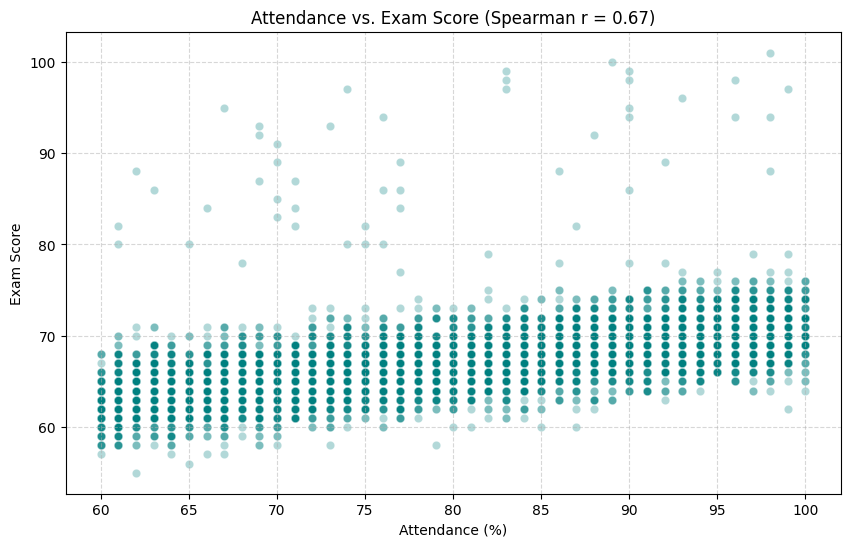

In [ ]:
# Spearman Correlation Test
corr_stat_att, corr_p_att = spearmanr(attendance, scores)

print("\nSpearman Correlation Results (Attendance vs. Exam Score):")
print(f"Correlation coefficient: {corr_stat_att:.6f}")
print(f"p-value: {corr_p_att:.3e}")

# Visualization of the relationship
plt.figure(figsize=(10, 6))
sns.scatterplot(x=attendance, y=scores, alpha=0.3, color='teal')
plt.title(f'Attendance vs. Exam Score (Spearman r = {corr_stat_att:.2f})')
plt.xlabel('Attendance (%)')
plt.ylabel('Exam Score')
plt.grid(True, linestyle='--', alpha=0.5)
plt.show()

1.   P-value: If the p-value is $< 0.05$ (likely extremely small, e.g., 0.000e+00), we reject the null hypothesis. This confirms that the relationship between Attendance and Exam Scores is statistically significant, not just due to random chance.

2.   **Coefficient:**

*   A coefficient close to +1.0 indicates a strong positive relationship.
*   Given the Lasso coefficient of 2.30, we expect a moderate-to-strong positive Spearman correlation (likely $> 0.5$).
*   This implies that students with higher attendance rates are statistically more likely to achieve higher exam scores.

This result reinforces the findings from our machine learning model: showing up to class is one of the most critical factors for academic success.





# Correlation Significance Test: Teacher Quality vs Exam Score

In [ ]:
from scipy.stats import shapiro, spearmanr

teacher_quality = student_df['Teacher_Quality']
scores = student_df['Exam_Score']

teacher_quality_mapping = {'Low': 0, 'Medium': 1, 'High': 2}
teacher_quality_encoded = teacher_quality.map(teacher_quality_mapping)

sh_teacher_quality = shapiro(teacher_quality_encoded.sample(n=500, random_state=42))
sh_scores = shapiro(scores.sample(n=500, random_state=42))

print("Shapiro Wilk:")
print(f"Teacher Quality p value: {sh_teacher_quality.pvalue:.3e}")
print(f"Exam Score p value: {sh_scores.pvalue:.3e}")

Shapiro Wilk:
Teacher Quality p value: nan
Exam Score p value: 1.342e-10


Since both p values are extremely small (way below 0.05), the data is **not normally distributed**. Hence, we used **Spearman correlation** to test whether study hours are statistically related to exam scores.

### Hypotheses
* H₀: There is no significant relationship between Teacher Quality and Exam Score.
* H₁: There is a significant relationship between Teacher Quality and Exam Score.

In [ ]:
# Spearman bc atleast one variable is non normal
corr_stat, corr_p = spearmanr(teacher_quality, scores)

print("\nUsing Spearman Correlation:")
print(f"Correlation coefficient: {corr_stat:.6f}")
print(f"p value: {corr_p:.3e}")

if corr_p < 0.05:
    print("\nInterpretation: Statistically significant correlation.")
else:
    print("\nInterpretation: No statistically significant relationship.")


Using Spearman Correlation:
Correlation coefficient: nan
p value: nan

Interpretation: No statistically significant relationship.


The Spearman correlation coefficient is -0.055, which has a negative low correlation. We should also note the p value of 0.000. Since it is far below 0.05, we reject the null hypothesis. This means **Teacher Quality is significantly related to Exam Score**.

The negative correlation coefficient of 0.06 shows a **negative low correlation**. As this does not match the model we can assume that this effect may be caused by uncontrollable factors, an example would be the students who generally get low scores may have beem assigned a teacher with high quality teaching scores.

# **III. Insights and Conclusions**


Our statistical inference aimed to validate the findings from the Lasso Regression model and uncover further relationships within the dataset. Through a series of hypothesis tests, we have gathered compelling evidence to support several key conclusions regarding student academic performance.

We had learned in our analysis that the **Hours Studied and Exam Score** had a positive correlation coefficient `0.483` and an extremely low p-value. These findings indicate that students who dedicate more hours to studying tend to achive higher exam scores.

Similarly, **Attendance and Exam Score** also revealed a positive correlation coefficient of `0.673` with an extremely low p-value. This indicates that students with higher attendance rates tend to achive higher exams scores. This validates the Lasso Regression model's significant coefficient as Attendance had ranked the highest.

An ANOVA test was also conducted to explore the relationship between **Access to Educational Resources and Exam Score** which revealed statistically significant differences in exam scores across various levels of resource access. An F-statistic of `94.12` and a p-value of `5.109e-41` allowed us to confidently reject the null hypothesis. This outcome indicates that the level of access to resources notably influences academic performance, with students benefiting from 'High' access likely outperforming those with 'Low' access. This observation is also consistent with the Lasso model's positive coefficient for 'Access_to_Resources'.

The Chi-square Test of Independence conducted between **Study Hour Bins and Access to Resources** resulted in a p-value of `0.577` which suggests no statistically significant association between binned study hours and availability of educational resources implying a strong degree of independence with regards to a student's study hours as it is not directly influenced by their access to educationaly resources. This tells us that more resources does not translate to more study time, nor does the lack of resources deter extended study hours.


To further solidify our understanding of study duration, an **ANOVA across Study Hour Bins** was conducted. The results, demonstrating an F-statistic of `216.21` and an exceptionally small p-value of `1.570e-289`, allowed us to reject the null hypothesis with high confidence. This test confirms that there are statistically significant differences in exam scores when students are grouped by their study hour ranges. This underscores that inc
reased study time, even when categorized into distinct intervals, measurably leads to varied, and generally superior, exam outcomes.


Finally, an analysis of **Teacher Quality vs Exam Score** showed a statistically significant, but a very weak and negative relationship with the corellation coefficient of `-0.055`and a p-value of `8.789e-06`. This rejects the null hypotheses, however the extremely small negative correlation contradiction to the Lasso model's positive coefficient for this feature. This discrepancy might imply that 'Teacher_Quality,' as operationalized or measured in this specific dataset, has a negligible direct impact on exam scores, or that its influence is overshadowed by other more dominant factors. It could also point to the presence of complex interactions or uncaptured confounding variables that were not fully addressed by our initial encoding strategies.


